# Churn Prediction for Bank Customer using Machine Learning

Dataset diperoleh dari Kaggle [Predicting Churn for Bank Customers](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers)

Variabel-variabel dalam dataset:


Kolom target:<br>
* **`Exited`** = mengacu pada apakah nasabah meninggalkan bank atau tidak (0=Tidak,1=Ya).

Kolom fitur:<br>
* **`RowNumber`** = sesuai dengan nomor baris dan tidak berpengaruh pada output.
* **`CustomerId`** = berisi nilai acak, tidak berhubungan pada nasabah bank yang churn.
* **`Surname`** = nama belakang nasabah, tidak berhubungan pada nasabah bank yang churn.
* **`CreditScore`** = mungkin berdampak pada keputusan churn nasabah, umumnya nasabah dengan nilai kredit yang lebih tinggi cenderung tidak meninggalkan bank.
* **`Geography`** = lokasi nasabah tinggal, mungkin relevan pada keputusan churn nasabah.
* **`Gender`** = jenis kelamin nasabah, mungkin relevan pada keputusan churn nasabah.
* **`Age`** =  usia nasabah, mungkin relevan pada keputusan churn nasabah.
* **`Tenure`** = mengacu pada jumlah tahun seseorang telah menjadi nasabah bank.
* **`Balance`** = saldo rekening nasabah, mungkin relevan pada keputusan churn nasabah.
* **`NumOfProducts`** = mengacu pada jumlah produk yang dibeli nasabah melalui bank.
* **`HasCrCard`** = apakah nasabah memiliki kartu kredit atau tidak (0=Tidak,1=Ya).
* **`IsActiveMember`** = apakah nasabah member aktif atau tidak (0=Tidak,1=Ya).
* **`EstimatedSalary`** = perkiraan gaji nasabah bank, mungkin relevan pada keputusan churn nasabah.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import pickle

from imblearn.over_sampling import SMOTE

# Stage 3: Modeling dan Feature Importance

## Load Dataset After Preprocessing

In [2]:
# split data train & test
with open('Dataset_After_Preprocessing.pkl', 'rb') as f:
    Dataset_After_Preprocessing = pickle.load(f)

Target `Exited` merupakan kolom dengan data kategorik. Oleh karena itu, pembuatan model ini akan menggunakan:
* Algoritma Non-Linear seperti **Logistic Regression**.
* Algoritma Non-Linear seperti **Decision Tree** dan **Random Forest**.
* Ensemble method dengan tujuan boosting (**Xgboost**).

## Model Validation
Split data train & test

In [3]:


X = Dataset_After_Preprocessing.drop(columns=['Exited'])
y = Dataset_After_Preprocessing['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Shape of X_train is:",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of X_train is: (12545, 16)
Shape of X_test is:  (3137, 16)
Shape of y_train is: (12545,)
Shape of y_test is:  (3137,)


In [4]:
# X_train = Xtrain #.astype('int')
y_train = y_train.astype('int')
# X_test  = Xtest #.astype('int')
y_test  = y_test.astype('int')

## Model 1. Logistic Regression

Shape of X_train is: (12545, 16)
Shape of X_test is: (3137, 16)
Shape of y_train is: (12545,)
Shape of y_test is: (3137,)
__________________________________Hasil Evaluasi Model Logistic Regression_________________________________________________
Accuracy Score of Model on Training Data is => 76.48 %
Accuracy Score of Model on Testing Data  is => 76.28 %
F1 Score of the Model is => 76.28
Recall Score of the Model is => 76.28
Precision Score of the Model is => 76.28
ROC AUC Score of the Model is => 0.8444697379278947
Cross-validation Accuracy Scores: [0.76564368 0.76046234 0.76683938 0.76564368 0.76325229]
Mean Cross-validation Accuracy: 0.7643682742128337
___________________________________________________________________________________


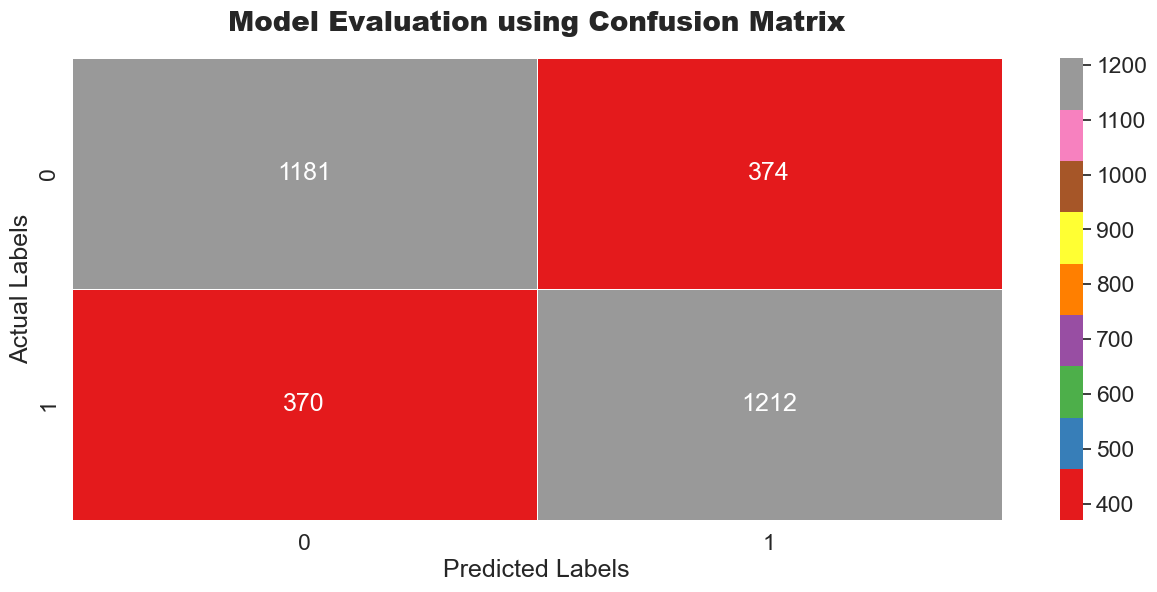

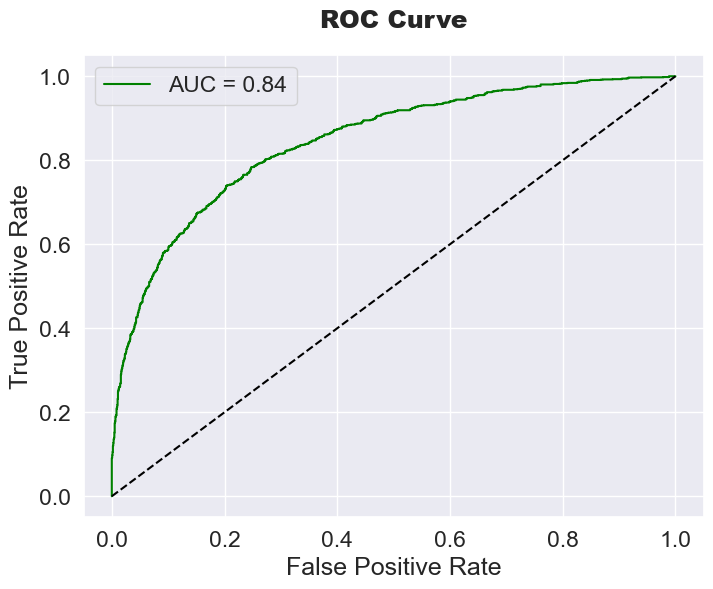

Parameter terbaik untuk RandomForest yaitu :


{'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
__________________________________Hasil Evaluasi Model Logistic Regression Hyper Parametrics Tunning_________________________________________________
Accuracy Score of Model on Training Data is => 76.47 %
Accuracy Score of Model on Testing Data  is => 76.38 %
F1 Score of the Model is => 76.38
Recall Score of the Model is => 76.38
Precision Score of the Model is => 76.38
ROC AUC Score of the Model is => 0.8444648598989435
Cross-validation Accuracy Scores: [0.76564368 0.76325229 0.76763651 0.76484655 0.76325229]
Mean Cross-validation Accuracy: 0.7649262654444001
___________________________________________________________________________________


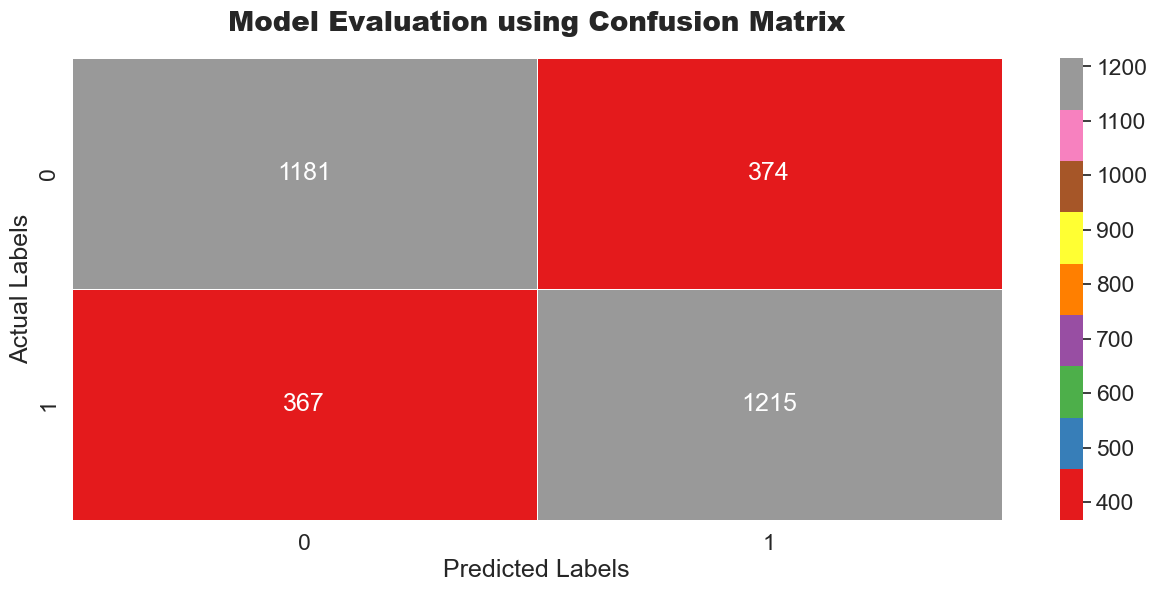

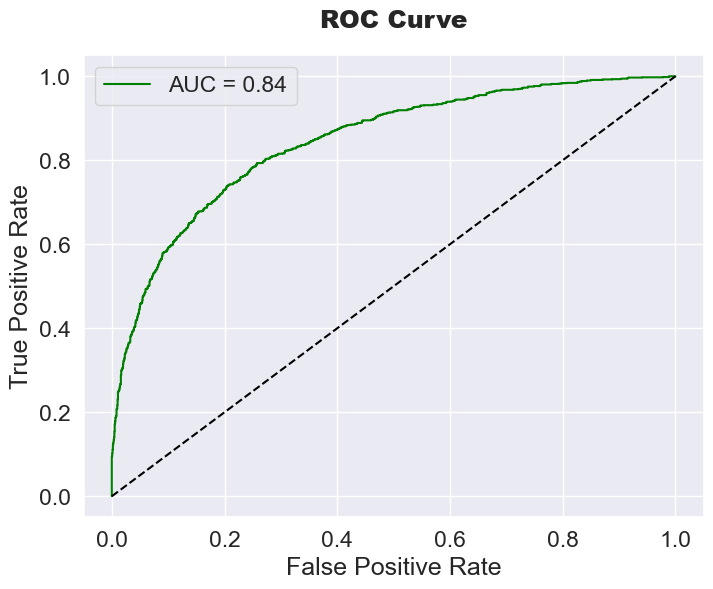

In [5]:
%run Model1LogisticRegression.ipynb

## Model 2. DecisionTree

Shape of X_train is: (12545, 16)
Shape of X_test is: (3137, 16)
Shape of y_train is: (12545,)
Shape of y_test is: (3137,)
Accuracy Score of Model on Training Data is => 100.0 %
Accuracy Score of Model on Testing Data  is => 90.69 %
F1 Score of the Model is => 90.69
Recall Score of the Model is => 90.69
Precision Score of the Model is => 90.69
ROC AUC Score of the Model is => 0.906345299409352
Cross-validation Accuracy Scores: [0.89079314 0.89039458 0.90593862 0.89517736 0.88840175]
Mean Cross-validation Accuracy: 0.8941410920685533


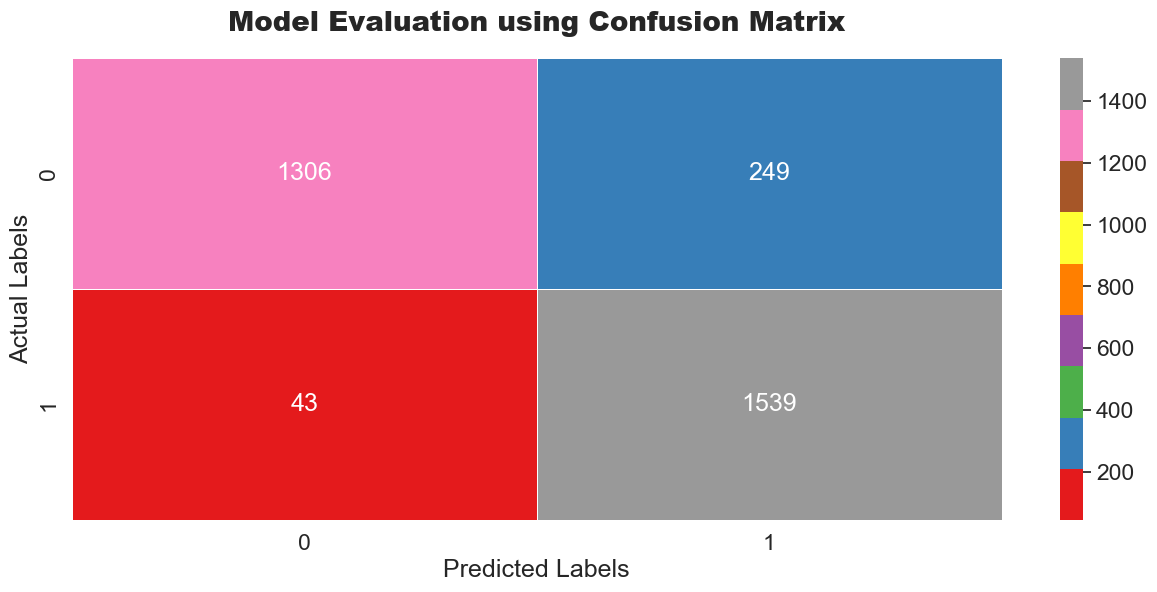

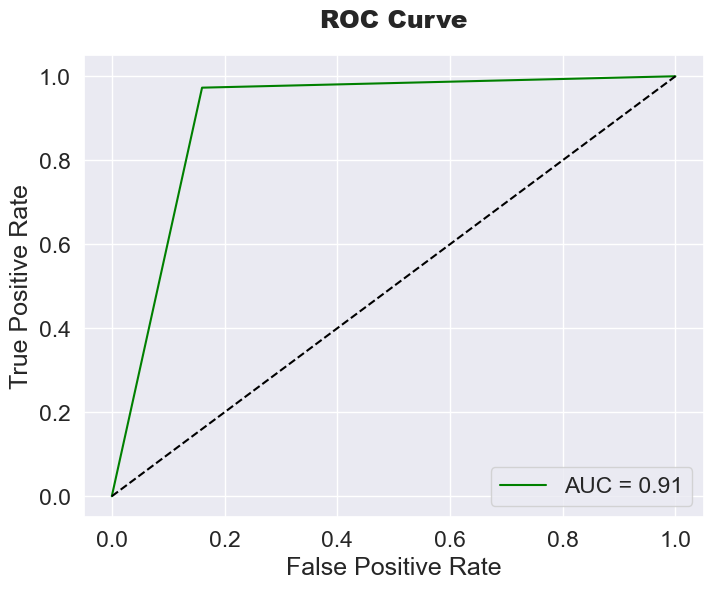

Parameter terbaik untuk DecisionTree Model yaitu:


Accuracy Score of Model on Training Data is => 88.19 %
Accuracy Score of Model on Testing Data  is => 82.28 %
Accuracy Score of Model on Training Data is => 88.19 %
Accuracy Score of Model on Testing Data  is => 82.28 %
F1 Score of the Model is => 82.28
Recall Score of the Model is => 82.28
Precision Score of the Model is => 82.28
ROC AUC Score of the Model is => 0.906345299409352
Cross-validation Accuracy Scores: [0.84176963 0.82861698 0.82781985 0.84296532 0.82861698]
Mean Cross-validation Accuracy: 0.833957752092467


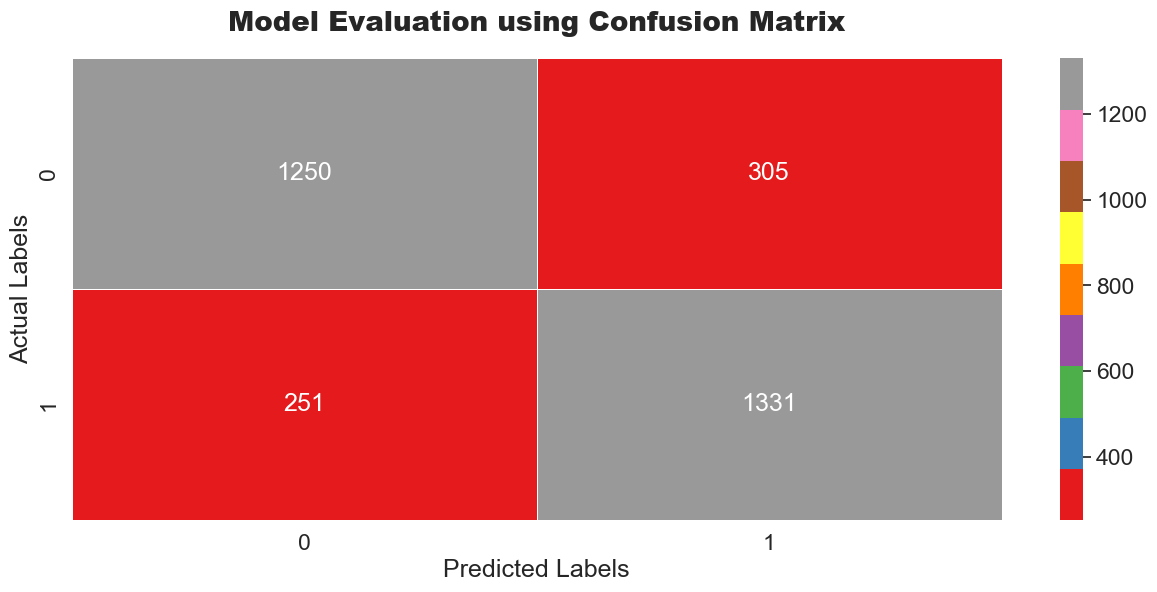

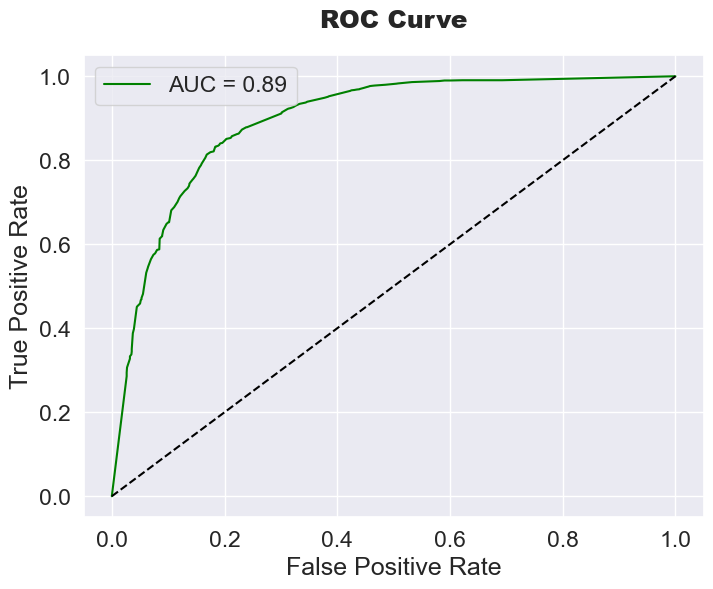

In [6]:
%run Model2DecisionTree.ipynb

## Model 3. Xgboost

Shape of X_train is: (12545, 16)
Shape of X_test is: (3137, 16)
Shape of y_train is: (12545,)
Shape of y_test is: (3137,)
__________________________________Hasil Evaluasi Model XGBoost_________________________________________________
Accuracy Score of Model on Training Data is => 96.25 %
Accuracy Score of Model on Testing Data  is => 89.29 %
F1 Score of the Model is => 89.29
Recall Score of the Model is => 89.29
Precision Score of the Model is => 89.29
ROC AUC Score of the Model is => 0.9537766106641843
Cross-validation Accuracy Scores: [0.90235153 0.89517736 0.9015544  0.89198884 0.89956158]
Mean Cross-validation Accuracy: 0.8981267437225988
___________________________________________________________________________________


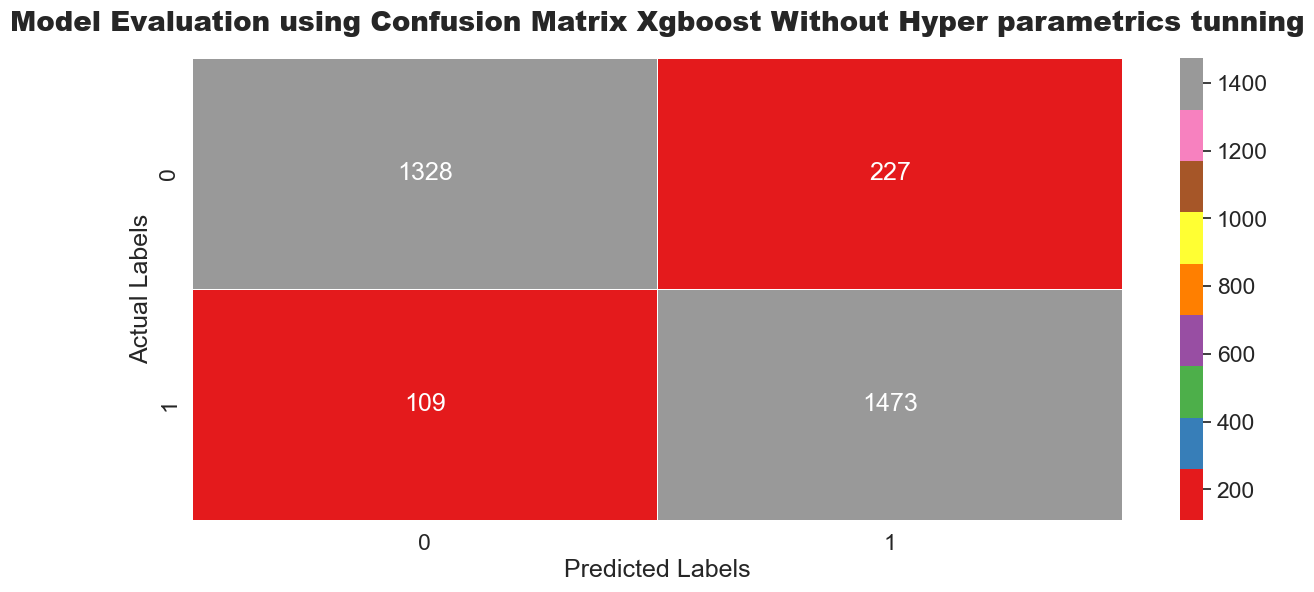

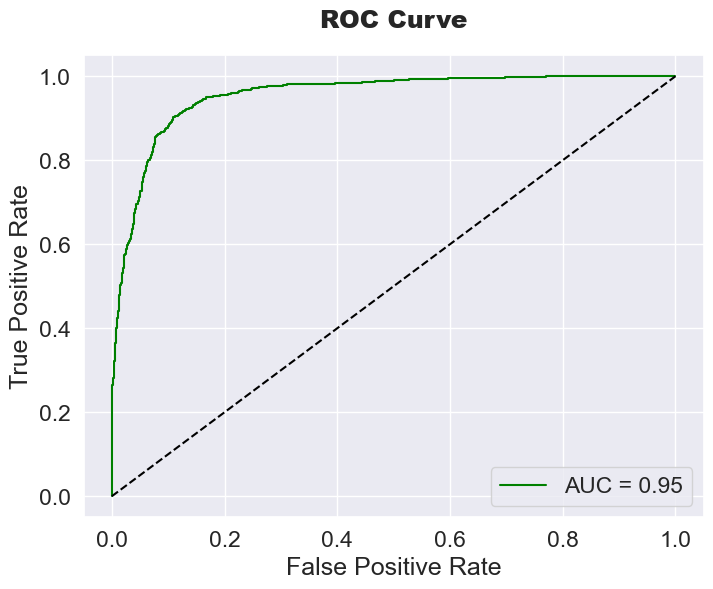

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Cross Validation Scores: [0.90235153 0.89517736 0.9015544  0.89198884 0.89956158]
Accuracy: 0.9318
Precision: 0.8968
Recall: 0.9772
F1 Score: 0.9353
Parameter terbaik untuk XGBoost Model yaitu:


__________________________________Hasil Evaluasi Model XGBoost Hyper Parametrics Tunning_________________________________________________
Accuracy Score of Model on Training Data is => 99.98 %
Accuracy Score of Model on Testing Data  is => 93.18 %
F1 Score of the Model is => 93.18
Recall Score of the Model is => 93.18
Precision Score of the Model is => 93.18
ROC AUC Score of the Model is => 0.9754086365502579
Cross-validation Accuracy Scores: [0.93264249 0.9198884  0.92865684 0.92506975 0.93064966]
Mean Cross-validation Accuracy: 0.9273814268632922
___________________________________________________________________________________


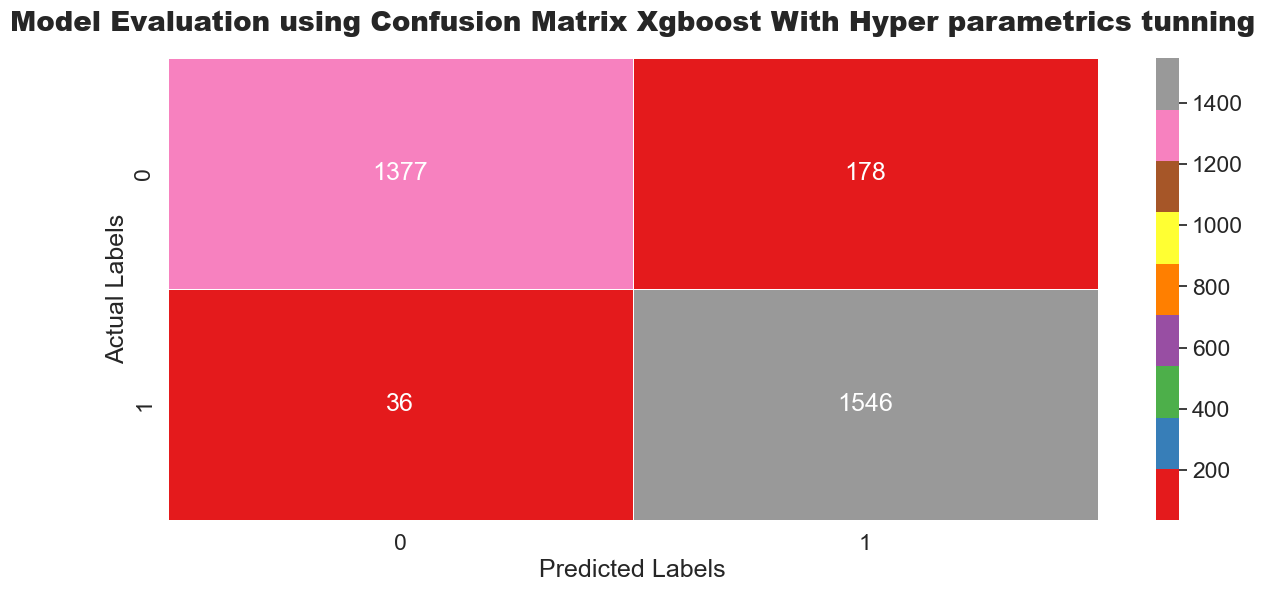

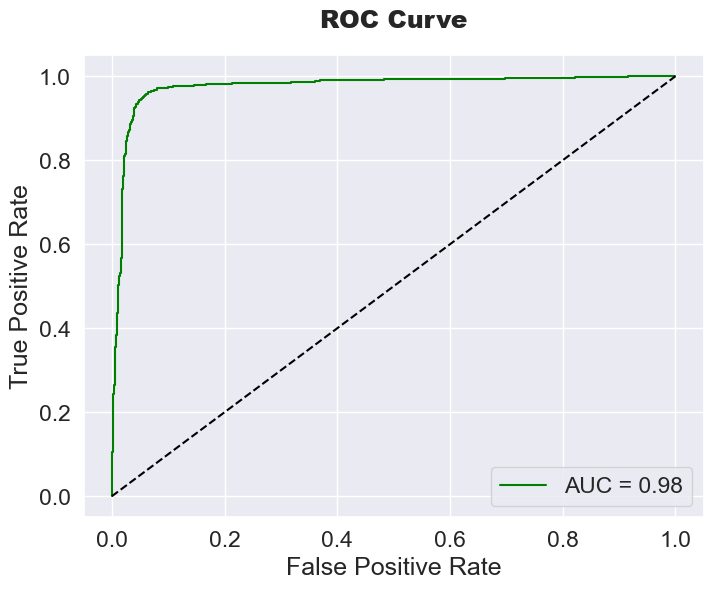

In [7]:
%run Model3XGBoost.ipynb

## Model 4. RandomForest

Shape of X_train is: (12545, 16)
Shape of X_test is: (3137, 16)
Shape of y_train is: (12545,)
Shape of y_test is: (3137,)
__________________________________Hasil Evaluasi Model Random Forest_________________________________________________
Accuracy Score of Model on Training Data is => 99.99 %
Accuracy Score of Model on Testing Data  is => 93.78 %
F1 Score of the Model is => 93.78
Recall Score of the Model is => 93.78
Precision Score of the Model is => 93.78
ROC AUC Score of the Model is => 0.9871748488827281
Cross-validation Accuracy Scores: [0.93662814 0.92746114 0.93622957 0.93543244 0.9370267 ]
Mean Cross-validation Accuracy: 0.9345555998405739
___________________________________________________________________________________


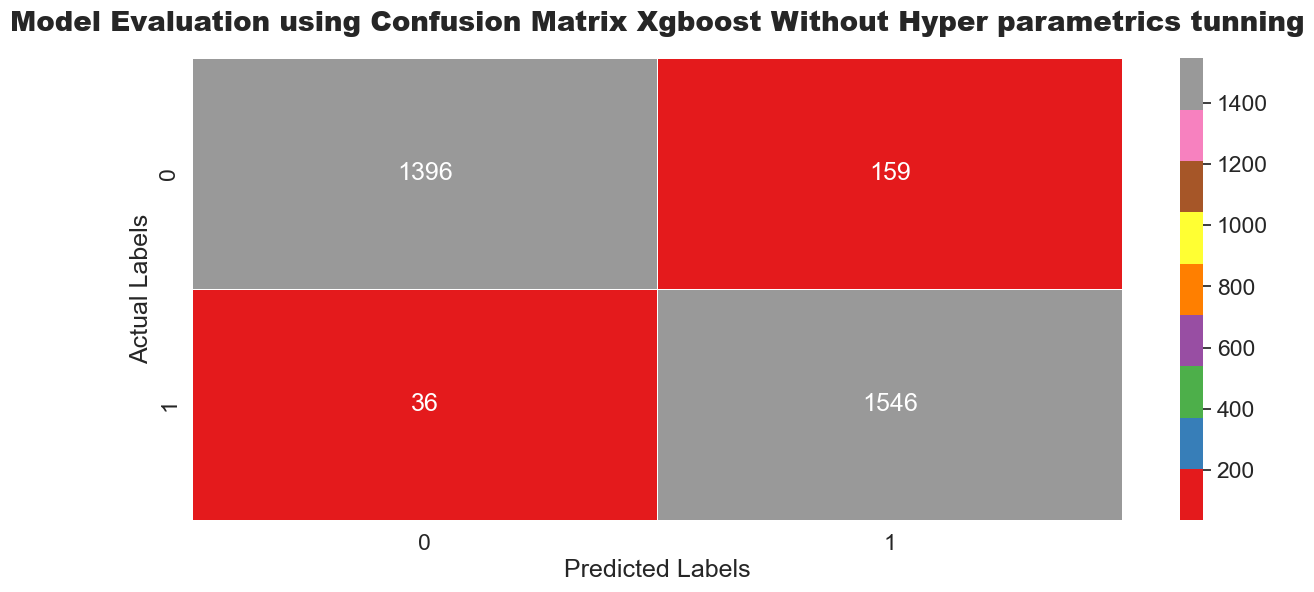

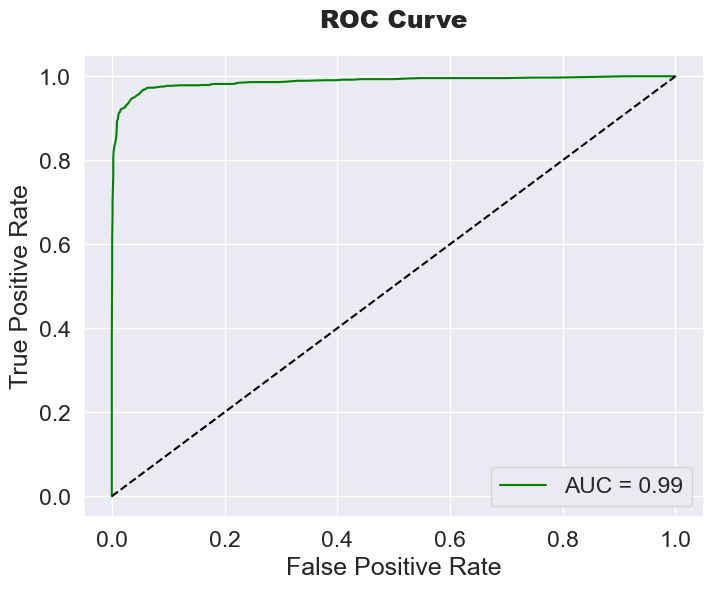

Parameter terbaik untuk Random Forest Model yaitu:


__________________________________Hasil Evaluasi Model Random Forest Hyper Parametrics Tunning_________________________________________________
Accuracy Score of Model on Training Data is => 76.81 %
Accuracy Score of Model on Testing Data  is => 76.47 %
F1 Score of the Model is => 76.47
Recall Score of the Model is => 76.47
Precision Score of the Model is => 76.47
ROC AUC Score of the Model is => 0.8462126170218821
Cross-validation Accuracy Scores: [0.76165803 0.76006377 0.77042646 0.77560781 0.76285373]
Mean Cross-validation Accuracy: 0.7661219609406138
__________________________________________________________________________________________________________________________________________________


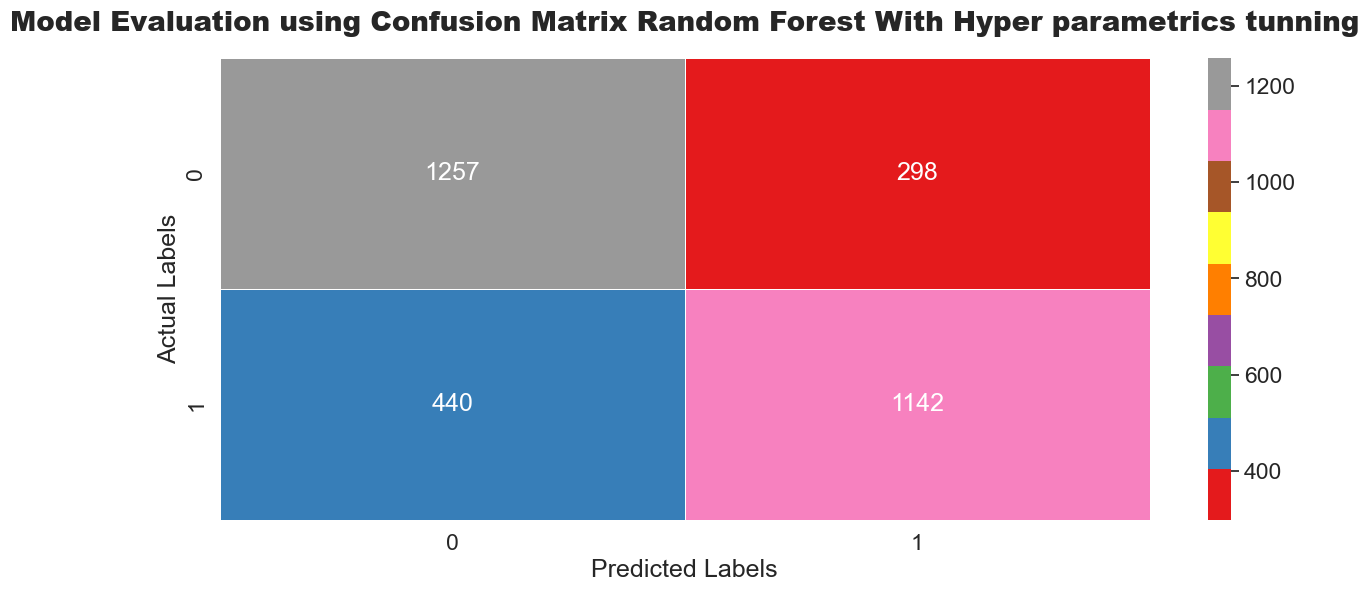

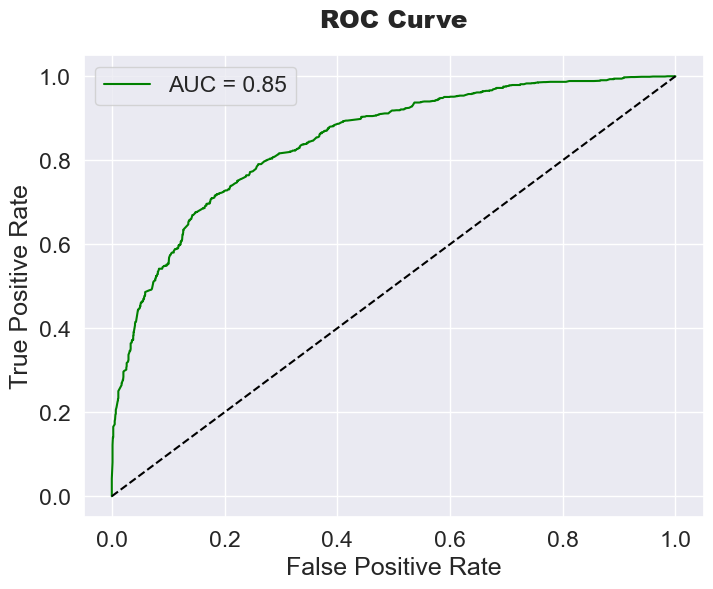

In [8]:
%run Model4RandomForest.ipynb

In [9]:
with open('RandomForest.pickle', 'rb') as f:
    RandomForest = pickle.load(f)

### Feature Importance

#### Feature importance with RandomForest

In [10]:
imptnc_df = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":rfc.feature_importances_})

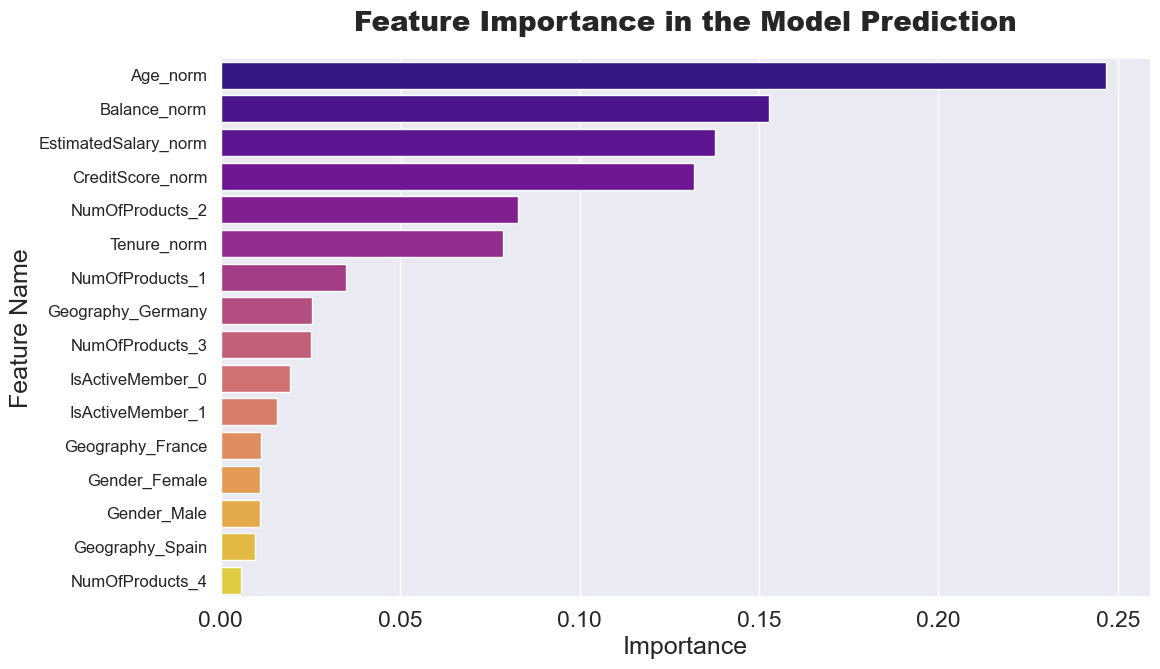

In [11]:
features = imptnc_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

#### Feature importance with SHAP
SHAP Summary Plot: Menjelaskan Model Predictions dengan Feature Importance

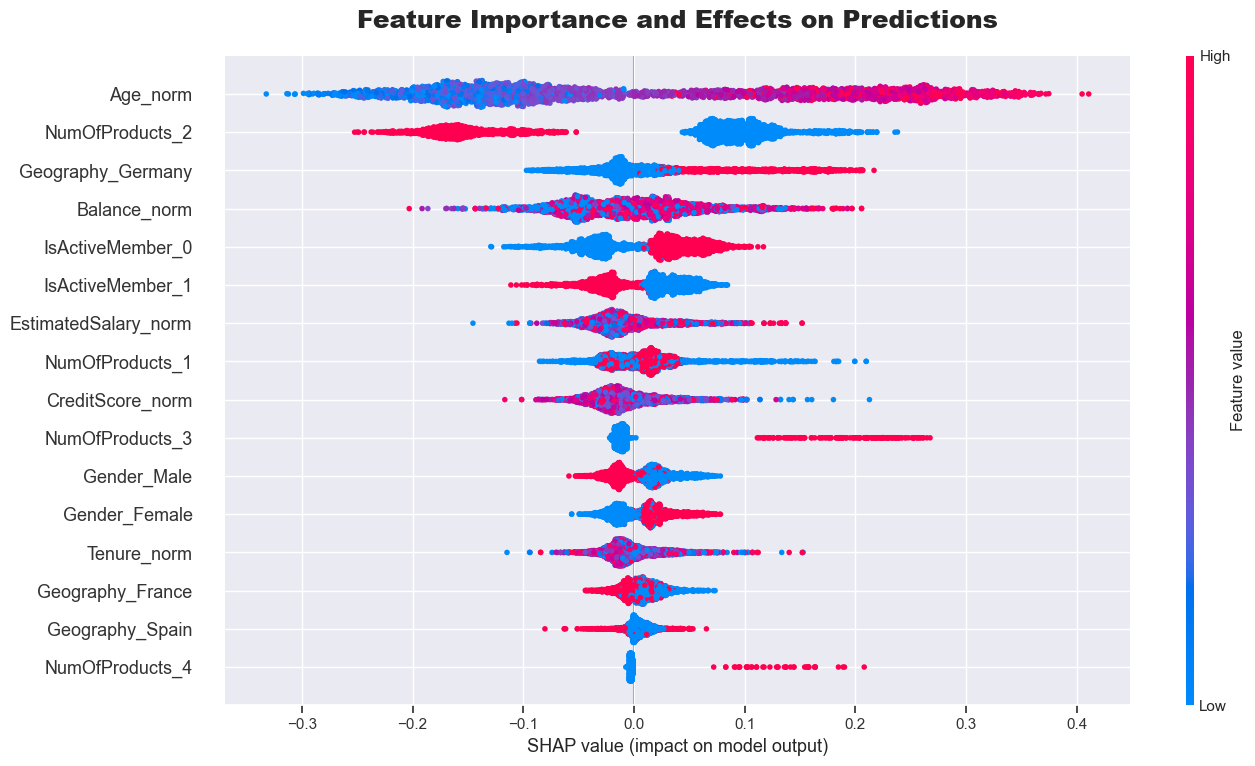

In [12]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

plt.title("Feature Importance and Effects on Predictions",fontweight="black",pad=20,size=18)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns,plot_size=(14,8))